In [5]:
# importing packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# reading in csv file

# initializing our csv file
file = "C:\\Users\\Owner\\OneDrive - Loyola University Chicago\\Summer_Projects_2023\\medication-price-prediction\\Clean_Drug_Information.csv"
file1 = "C:\\Users\\Owner\\OneDrive - Loyola University Chicago\\Summer_Projects_2023\\medication-price-prediction\\Complete_Drug_Info.csv"

# Creating our overall data frame
df = pd.read_csv(file)
df1 = pd.read_csv(file1)


In [5]:
# creating a new column specifically for this file of total project revenue from drug sales
df['Total Revenue'] = df['Total Prescriptions']*df['Average Drug Price Per Prescription']

In [6]:
# seeing how many unique classifications of drugs there are
df_class = df['Drug Class'].unique()
print(df_class)

['1' 'HMG-CoA Reductase Inhibitor' 'l-Thyroxine' 'Biguanide'
 'Angiotensin Converting Enzyme Inhibitor'
 'Dihydropyridine Calcium Channel Blocker' 'beta-Adrenergic Blocker'
 'beta2-Adrenergic Agonist' 'Proton Pump Inhibitor'
 'Angiotensin 2 Receptor Blocker' 'Anti-epileptic Agent'
 'Thiazide Diuretic' 'Serotonin Reuptake Inhibitor'
 'Leukotriene Receptor Antagonist' 'Opioid Agonist' 'Aminoketone'
 'Loop Diuretic' 'Central Nervous System Stimulant' 'Corticosteroid'
 'alpha-Adrenergic Blocker'
 'alpha-Adrenergic Blocker, beta-Adrenergic Blocker'
 'Serotonin and Norepinephrine Reuptake Inhibitor'
 'Nonsteroidal Anti-inflammatory Drug' 'P2Y12 Platelet Inhibitor'
 'Insulin Analog' 'Potassium Salt'
 'Nonsteroidal Anti-inflammatory Drug, Platelet Aggregation Inhibitor'
 'Benzodiazepine' 'Muscle Relaxant' 'Penicillin-class Antibacterial'
 'Xanthine Oxidase Inhibitor' 'Estrogen, Progestin'
 'Provitamin D2 Compound' 'gamma-Aminobutyric Acid-ergic Agonist'
 'Factor Xa Inhibitor' 'Sulfonylurea'
 '

In [7]:
name_class = df[['Drug Name', "Drug Class"]].groupby('Drug Class').count()
name_class.to_csv('Unique_Classes.csv')

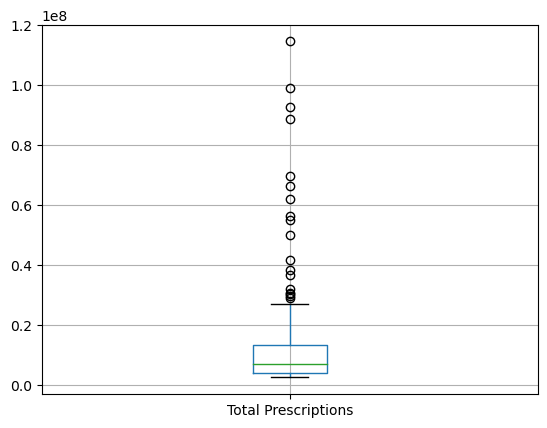

In [8]:
### Creating a boxplot to see the range and averages of prescriptions, patients, and avg price ###

# creating a df with only the numerical data stated from above
num_df = df[['Total Prescriptions', 'Total Patients', 'Average Drug Price Per Prescription', 'Total Revenue']]

box = df.boxplot(column = ['Total Prescriptions'])
plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_17492\3966274643.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = quant_df.corr()


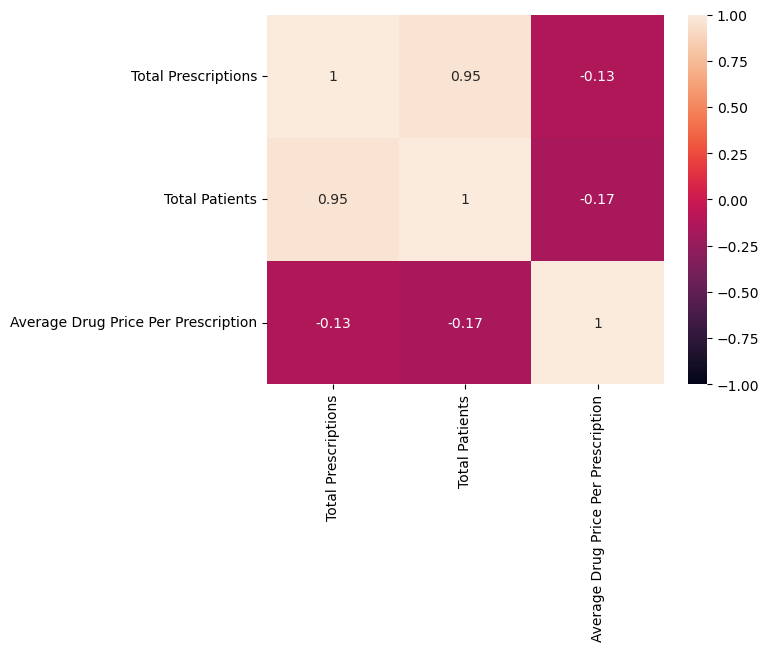

In [9]:
'''making a heatmap of using different quantitative data columns''' 

# creating new df with only desired quantitative columns
quant_df = df[['Total Prescriptions','Total Patients','Average Drug Price Per Prescription']]

# With this new df, use pandas .corr on the df to create a correlation df
corr_df = quant_df.corr()

# Smallest value will be equal to -1 and the max will be 1, we want annotations to be true to see
# our r-values
corr_heatmap = sns.heatmap(corr_df, vmin=-1, vmax=1, annot=True)
plt.show()

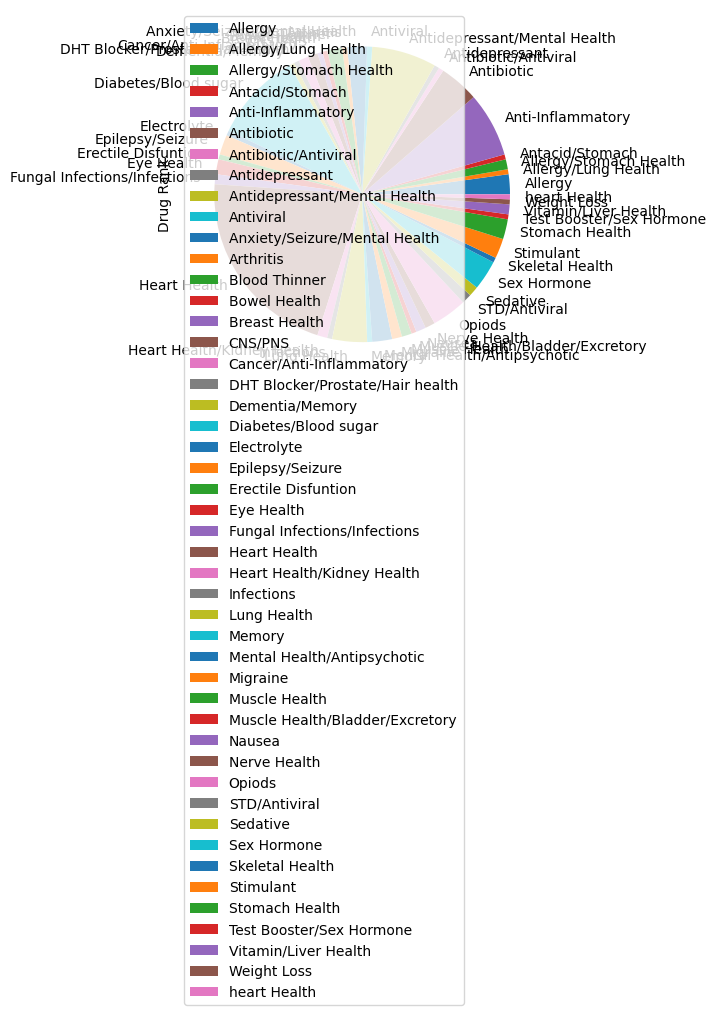

In [16]:
'''Making a pie chart'''

# creating a pie chart of Drug classfication
gen_class = df1[['General Classification', 'Drug Rank']]

count = gen_class.groupby('General Classification', as_index=False).count()

count.plot.pie(y="Drug Rank", labels=count['General Classification'])

plt.show()

In [15]:
# creating new column in Complete drug info
# it will be the number of years it has been on the market

# first making all valus in FDA approval date column date time objects
# specifically if it is prior to 1982 just make it 1980
df1['FDA Approval Date'] = df['FDA Approval Date'].apply(lambda x: pd.to_datetime("01-01-1980") if x == "Prior to January 1, 1982" else (x))


# converting all dates to datetime values #

date_format = '%m/%d/%Y'           # establsihing a date format

df1['FDA Approval Date'] = df1['FDA Approval Date'].apply(lambda x: datetime.strptime(x, date_format) if isinstance(x, str) else (x))

# creating reference date of the year 2020, this was the latest year this info has been updated
current_date = pd.to_datetime('2020-01-01')
df1['Years Since Approval'] = ((df1['FDA Approval Date'] - current_date).dt.days // 365.25) * (-1)

In [11]:


df1 = df1.drop(['Unnamed: 0', 'Unnamed:  0', "Unnamed: 0.1"], axis=1)

In [11]:
print(df1.dtypes)

Unnamed: 0.1                             int64
Unnamed: 0                               int64
Unnamed:  0                              int64
Drug Rank                              float64
Drug Name_x                             object
Total Prescriptions                    float64
Total Patients                         float64
Average Drug Price Per Prescription    float64
Drug Class                              object
FDA Approval Date                       object
General Classification                  object
dtype: object
